## Stratification in Diabetes-Depression Comorbidity by Gender

#### Import Boiler Plate Modules:

In [1]:
# This line configures matplotlib to show figures embedded in the notebook.
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import cross_val_score

#### Load Data from source U.S. Chronic Disease: https://www.cdc.gov/cdi/index.html


In [2]:
df_all = pd.read_csv("U.S._Chronic_Disease_Indicators__CDI_.csv") #load the complete dataset 
df_all.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,59,ALC,ALC2_2,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,1,ALC,ALC2_2,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,2,ALC,ALC2_2,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,4,ALC,ALC2_2,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,...,5,ALC,ALC2_2,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


In [3]:
diarawsamples = df_all.shape[0] #Number of entries in dataset
print("Total number of samples in dataset:", diarawsamples)
print("Number of null values in each column: ")
print(df_all.isnull().sum()) #Number of nullvalues per column

Total number of samples in dataset: 523486
Number of null values in each column: 
YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     444334
DataValueUnit                 49370
DataValueType                     0
DataValue                    143616
DataValueAlt                 167758
DataValueFootnoteSymbol      297753
DatavalueFootnote            297919
LowConfidenceLimit           210586
HighConfidenceLimit          210586
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      444334
Stratification2              444334
StratificationCategory3      444334
Stratification3              444334
GeoLocation                    3726
ResponseID                   444334
LocationID                        0
TopicID           

Excel Spreadsheet showed that StratificationCategory2 was empty, yet our isnull().sum() show that it does have entries

In [4]:
print("Guessed that the entries in StratificationCategory2 had spaces instead of null, how many are spaces?", 
      df_all[df_all['StratificationCategory2'] == ' '].shape[0]) 
# since a ' ' is essentially an empty entry, we will treat it as a null value
diaMissing = (df_all.astype(np.object) == ' ').sum() + df_all.isnull().sum() # cannot sum strings, must make object
print("Total number of samples is", diarawsamples)
print("Columns with all missing values should be equal to number of samples: ")
diaMissing #dataframe of ' ' and null entries

Guessed that the entries in StratificationCategory2 had spaces instead of null, how many are spaces? 79152
Total number of samples is 523486
Columns with all missing values should be equal to number of samples: 


YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
Response                     523486
DataValueUnit                 53046
DataValueType                     0
DataValue                    166671
DataValueAlt                 167758
DataValueFootnoteSymbol      353851
DatavalueFootnote            353851
LowConfidenceLimit           210586
HighConfidenceLimit          210586
StratificationCategory1           0
Stratification1                   0
StratificationCategory2      523486
Stratification2              523486
StratificationCategory3      523486
Stratification3              523486
GeoLocation                    3726
ResponseID                   523486
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID             

In [5]:
EmptyColumns = diaMissing[diaMissing == diarawsamples].index #identifying empty columns
print("These columns had all null or space values:")
EmptyColumns

These columns had all null or space values:


Index(['Response', 'StratificationCategory2', 'Stratification2',
       'StratificationCategory3', 'Stratification3', 'ResponseID',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [6]:
df = df_all.drop(EmptyColumns, axis = 1) #drop empty columns
print("Drop all empty columns:")
df.head()

Drop all empty columns:


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,16.9,...,18.0,Overall,Overall,NaN,59,ALC,ALC2_2,CrdPrev,OVERALL,OVR
1,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,13,...,14.1,Overall,Overall,"(32.84057112200048, -86.63186076199969)",1,ALC,ALC2_2,CrdPrev,OVERALL,OVR
2,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,18.2,...,20.6,Overall,Overall,"(64.84507995700051, -147.72205903599973)",2,ALC,ALC2_2,CrdPrev,OVERALL,OVR
3,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,15.6,...,16.9,Overall,Overall,"(34.865970280000454, -111.76381127699972)",4,ALC,ALC2_2,CrdPrev,OVERALL,OVR
4,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,%,Crude Prevalence,15,...,17.2,Overall,Overall,"(34.74865012400045, -92.27449074299966)",5,ALC,ALC2_2,CrdPrev,OVERALL,OVR


#### A lot of info is duplicated between rows: pull them out and made look up tables (keep the ID, so we can merge it back)

In [7]:
# Extract location-related attributes into a location table.
dfLocs = df[['LocationID', 'GeoLocation', 'LocationAbbr', 'LocationDesc']]\
    .set_index('LocationID').groupby('LocationID').first()

# Split GeoLocation string into Latitude and Longitude floats
geoLocs = dfLocs['GeoLocation'].str[1:-1].str.split(',', expand=True).astype('float')
geoLocs.columns=['Latitude', 'Longitude']
# Combine Lat/Long into Locations table, and drop unused column.
dfLocs = (pd.concat([dfLocs, geoLocs], axis=1)).drop('GeoLocation', axis=1)
dfLocs.head()

,LocationAbbr,LocationDesc,Latitude,Longitude
LocationID,,,,
1,AL,Alabama,32.840571,-86.631861
2,AK,Alaska,64.845080,-147.722059
4,AZ,Arizona,34.865970,-111.763811
5,AR,Arkansas,34.748650,-92.274491
6,CA,California,37.638640,-121.000000


In [8]:
# Extract topic attributes into a topic table.
dfTopics = df[['TopicID', 'Topic']].groupby('TopicID').first()
dfTopics.head()

,Topic
TopicID,
ALC,Alcohol
ART,Arthritis
AST,Asthma
CAN,Cancer
CKD,Chronic Kidney Disease


In [9]:
# Extract question attributes into a question table.
dfQuestions = df[['QuestionID', 'Question']].groupby('QuestionID').first()
dfQuestions.head()

,Question
QuestionID,
ALC10_0,Local authority to regulate alcohol outlet den...
ALC1_1,Alcohol use among youth
ALC1_2,Alcohol use before pregnancy
ALC2_1,Binge drinking prevalence among youth
ALC2_2,Binge drinking prevalence among adults aged >=...


In [10]:
# Extract Stratification attributes into a Stratification table.
dfStrats = df[['StratificationID1', 'Stratification1']].groupby('StratificationID1').first()
dfStrats

,Stratification1
StratificationID1,
AIAN,American Indian or Alaska Native
API,Asian or Pacific Islander
ASN,"Asian, non-Hispanic"
BLK,"Black, non-Hispanic"
GENF,Female
GENM,Male
HIS,Hispanic
MRC,"Multiracial, non-Hispanic"
OTH,"Other, non-Hispanic"


In [11]:
# Extract StratificationCategory attributes into a StratificationCategory table.
dfStratCats = df[['StratificationCategoryID1', 'StratificationCategory1']] \
    .groupby('StratificationCategoryID1').first()
dfStratCats

,StratificationCategory1
StratificationCategoryID1,
GENDER,Gender
OVERALL,Overall
RACE,Race/Ethnicity


In [12]:
# Extract DataValueType attributes into a DataValueType table.
dfDataValueTypes = df[['DataValueTypeID', 'DataValueType', 'DataValueUnit']]\
    .groupby('DataValueTypeID').first()
dfDataValueTypes

,DataValueType,DataValueUnit
DataValueTypeID,,
AgeAdjMean,Age-adjusted Mean,Number
AgeAdjPrev,Age-adjusted Prevalence,%
AgeAdjRate,Age-adjusted Rate,"cases per 10,000"
AgeSexRaceAdjRate,"Adjusted by age, sex, race and ethnicity","cases per 1,000,000"
AvgAnnAgeAdjRate,Average Annual Age-adjusted Rate,"per 100,000"
AvgAnnCrdRate,Average Annual Crude Rate,"per 100,000"
AvgAnnNmbr,Average Annual Number,NaN
CommHstLiab,Commercial host (dram shop) liability status f...,NaN
CrdPrev,Crude Prevalence,%


Now that we have "de-melted" the diabetes data, we will drop all of the duplicate columns into a simpler dataframe using ID's and lookup tables:

In [13]:
dfData = df.drop(['GeoLocation', 'LocationAbbr', 'LocationDesc', 'Topic', 'Question', 
    'Stratification1', 'StratificationCategory1', 'DataValueType', 'DataValueUnit'], axis=1)
dfData.head()

,YearStart,YearEnd,DataSource,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2016,2016,BRFSS,16.9,16.9,*,50 States + DC: US Median,16.0,18.0,59,ALC,ALC2_2,CrdPrev,OVERALL,OVR
1,2016,2016,BRFSS,13,13.0,NaN,NaN,11.9,14.1,1,ALC,ALC2_2,CrdPrev,OVERALL,OVR
2,2016,2016,BRFSS,18.2,18.2,NaN,NaN,16.0,20.6,2,ALC,ALC2_2,CrdPrev,OVERALL,OVR
3,2016,2016,BRFSS,15.6,15.6,NaN,NaN,14.3,16.9,4,ALC,ALC2_2,CrdPrev,OVERALL,OVR
4,2016,2016,BRFSS,15,15.0,NaN,NaN,13.0,17.2,5,ALC,ALC2_2,CrdPrev,OVERALL,OVR


### Now to Drill into Diabetes

In [14]:
dfDia = dfData[dfData["TopicID"] == 'DIA'] 
types = dfDia['DataValueTypeID'].value_counts().index 
print("How many values for each measurement type are not null:")
for t in types:
    n = dfDia[dfDia['DataValueTypeID'] == t]['DataValueAlt'].notnull()
    print("%s: %0.1f%%; %d / %d" % (t, 100 * n.sum() / n.count(), n.sum(), n.count()))

How many values for each measurement type are not null:
CrdPrev: 53.6%; 17152 / 32012
AgeAdjPrev: 54.5%; 16352 / 30007
CrdRate: 58.3%; 3396 / 5830
Nmbr: 58.3%; 3396 / 5830
AgeAdjRate: 58.3%; 3396 / 5830
Prev: 100.0%; 52 / 52


In [15]:
qs = dfDia['QuestionID'].value_counts().index
print("How many values for each question are not null:")
for q in qs:
    n = dfDia[dfDia['QuestionID'] == q]['DataValueAlt'].notnull()
    print("%s: %0.1f%%; %d / %d" % (q, 100 * n.sum() / n.count(), n.sum(), n.count()))

How many values for each question are not null:
DIA1_2: 36.1%; 2214 / 6135
DIA1_1: 81.5%; 4998 / 6135
DIA13_1: 58.5%; 3052 / 5220
DIA2_1: 81.3%; 4242 / 5220
DIA13_2: 56.2%; 2934 / 5220
DIA11_3: 60.1%; 3136 / 5220
DIA12_2: 56.8%; 2965 / 5220
DIA12_1: 59.5%; 3106 / 5220
DIA10_0: 39.3%; 2052 / 5216
DIA5_0: 39.2%; 2045 / 5216
DIA7_0: 39.3%; 2050 / 5216
DIA6_0: 38.8%; 2024 / 5216
DIA11_1: 64.5%; 1683 / 2610
DIA9_0: 64.1%; 1674 / 2610
DIA8_0: 65.1%; 1699 / 2610
DIA4_0: 49.9%; 1302 / 2610
DIA11_2: 65.3%; 1704 / 2610
DIA2_2: 40.5%; 789 / 1950
DIA3_1: 41.8%; 23 / 55
DIA3_2: 100.0%; 52 / 52


### Flesh out the data by filling in nullvalues

In [16]:
#for easy use, make a function to show the number usable values per measurement type
def notNullHeatMap(df, cmap="Blues", columns='DataValueTypeID', figsize=(12,6)):
    usable = pd.pivot_table(df, index='QuestionID', columns=columns, values='DataValueAlt', 
                   aggfunc=lambda x: sum(x.notnull()))
    # Strip off 'DIA' prefix -- makes viewing better
    usable.index = usable.index.str[3:]
    fig, ax = plt.subplots(figsize=figsize)   
    _ = sns.heatmap(usable, cmap=cmap, annot=True, fmt='g', ax=ax)

Usable datapoints in the `dfDia`:

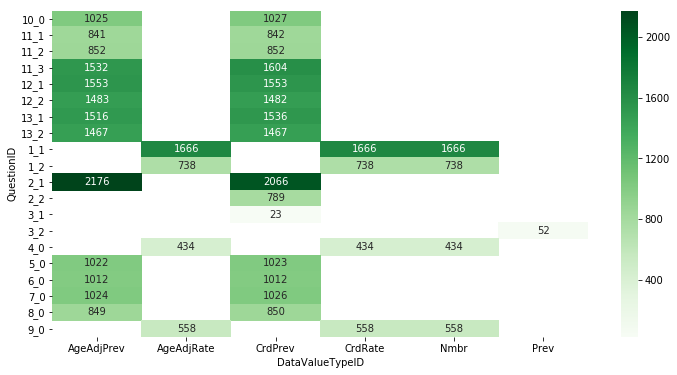

In [17]:
notNullHeatMap(dfDia, "Greens")

Is 3_1 worth keeping with only 23 usable values? 

In [18]:
print(dfDia[dfDia['QuestionID'] == 'DIA3_1']['DatavalueFootnote'].value_counts())
print("Footnote given by CDC as not having enough data, so we will drop it")

No data available    32
Name: DatavalueFootnote, dtype: int64
Footnote given by CDC as not having enough data, so we will drop it


Is 3_2 worth keeping with only 52 usable values?

In [19]:
print(len(dfDia[(dfDia['QuestionID'] == 'DIA3_2') & dfDia['DataValueAlt'].notnull()]['LocationID'].unique())) 
print("One entry per location, therefore might be useful")

52
One entry per location, therefore might be useful


As we can see there are questions that have multiple measurements: we should keep only one measurement for each question. Therefore, when we pivot, there is no conflict

We eliminated the `AgeAdj` measurements because we want to work with the crude values.

We are drilling into an example using `DIA4_0`, `LocationID` `8` and `StratificationCategoryID1` `OVERALL` to evaluate the difference between `CrdRate` and `Numbr`

In [20]:
dfDia[(dfDia['QuestionID'] == 'DIA4_0') & dfDia['DataValueAlt'].notnull() &
      (dfDia['LocationID'] == 8) & (dfDia['StratificationCategoryID1'] == 'OVERALL')].head()

,YearStart,YearEnd,DataSource,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
133199,2013,2013,State Inpatient Data,1.76,1.76,,,1.65,1.86,8,DIA,DIA4_0,AgeAdjRate,OVERALL,OVR
133398,2013,2013,State Inpatient Data,1.87,1.87,,,1.76,1.99,8,DIA,DIA4_0,CrdRate,OVERALL,OVR
133599,2013,2013,State Inpatient Data,988,988.00,,,NaN,NaN,8,DIA,DIA4_0,Nmbr,OVERALL,OVR
257444,2010,2010,State Inpatient Data,1.74,1.74,,,1.63,1.86,8,DIA,DIA4_0,AgeAdjRate,OVERALL,OVR
257685,2010,2010,State Inpatient Data,1.76,1.76,,,1.64,1.87,8,DIA,DIA4_0,CrdRate,OVERALL,OVR


Pulling everything together, we are dropping `DIA3_1`, and only looking at measurement types: `CrdPrev`, `CrdRate`, `Prev`

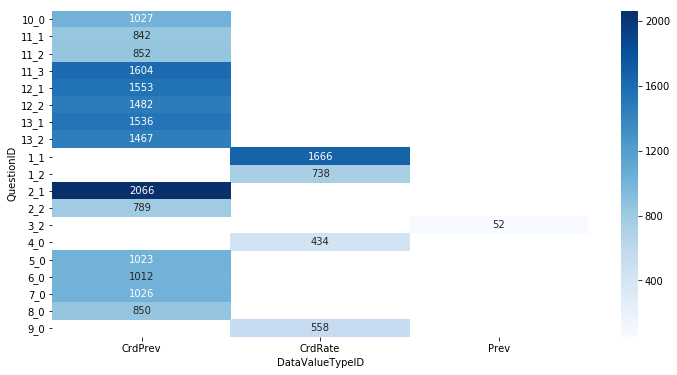

In [21]:
#make a dataframe with one type of measurement per question
dfOneType = dfDia[(dfDia['QuestionID'] != 'DIA3_1') &
                   dfDia['DataValueTypeID'].isin(['CrdPrev', 'CrdRate', 'Prev'])]
notNullHeatMap(dfOneType)

### Now we are ready to pivot up the `QuestionID` into columns

The Index order is set intentionally: we have the years in a group together for each location and stratification category, hence why we didn't do the normal `reset_index()` function

In [22]:
sparsePivot = pd.pivot_table(dfOneType, index=['StratificationCategoryID1', 'StratificationID1',
                                               'LocationID', 'YearStart', 'YearEnd'], 
                             columns='QuestionID', values='DataValueAlt')
sparsePivot.head(10) #note the careful order of indices in multi-index

QuestionID                                                                DIA10_0  \
StratificationCategoryID1 StratificationID1 LocationID YearStart YearEnd            
GENDER                    GENF              1          2010      2010         NaN   
                                                       2011      2011        52.7   
                                                       2012      2012        55.3   
                                                       2013      2013        54.2   
                                                       2014      2014         NaN   
                                                       2015      2015         NaN   
                                                       2016      2016        54.8   
                                            2          2010      2010         NaN   
                                                       2011      2011        64.5   
                                                       2012      2012        77.9   

QuestionID                                                                DIA11_1  \
StratificationCategoryID1 StratificationID1 LocationID YearStart YearEnd            
GENDER                    GENF              1          2010      2010         NaN   
                                                       2011      2011        72.9   
                                                       2012      2012         NaN   
                                                       2013      2013        70.1   
                                                       2014      2014         NaN   
                                                       2015      2015        67.9   
                                                       2016      2016         NaN   
                                            2          2010      2010         NaN   
                                                       2011      2011        59.0   
                                                       2012      2012         NaN   

QuestionID                                                                DIA11_2  \
StratificationCategoryID1 StratificationID1 LocationID YearStart YearEnd            
GENDER                    GENF              1          2010      2010         NaN   
                                                       2011      2011        78.1   
                                                       2012      2012         NaN   
                                                       2013      2013        79.4   
                                                       2014      2014         NaN   
                                                       2015      2015        78.6   
                                                       2016      2016         NaN   
                                            2          2010      2010         NaN   
                                                       2011      2011        77.2   
                                                       2012      2012         NaN   

QuestionID                                                                DIA11_3  \
StratificationCategoryID1 StratificationID1 LocationID YearStart YearEnd            
GENDER                    GENF              1          2010      2010         NaN   
                                                       2011      2011        33.8   
                                                       2012      2012        36.7   
                                                       2013      2013        35.4   
                                                       2014      2014        35.3   
                                                       2015      2015        38.5   
                                                       2016      2016        40.1   
                                            2          2010      2010         NaN   
                                                       2011      2011        43.6   
  

Make a function to easily see the relative differences in `notnull()` counts

In [23]:
def notNullBarChart(df, cmap="Blues", figsize=(12, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.barh(df.columns, df.notnull().sum())

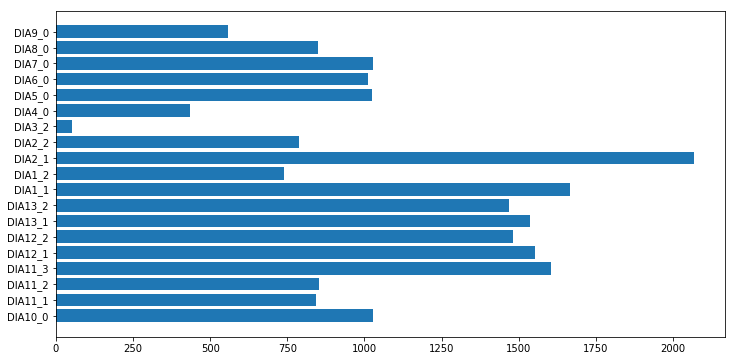

In [24]:
sparsePivot = sparsePivot[sparsePivot.notnull().sum(axis=1) > 0] #keep only columns with at least 1 notnull value
notNullBarChart(sparsePivot)

### Start to delve into Gender Differences

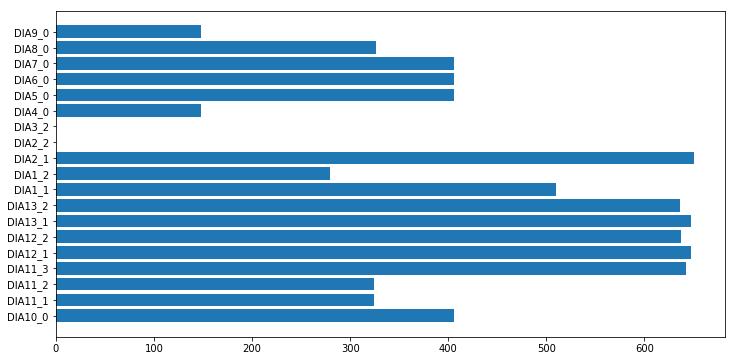

In [25]:
dfGender = sparsePivot.loc['GENDER'] #NOTE USE OF MULTI-INDEX :D
notNullBarChart(dfGender)

`DIA3_2` and `DIA2_2` have no gender information, drop them.

In [26]:
dfGender = sparsePivot.loc['GENDER'].drop(['DIA3_2', 'DIA2_2'], axis=1)
dfGender = dfGender[~dfGender.index.isin([59],1)] #location 59 is overall U.S. -- drop it

Question `DIA9_0` appears to be missing the most data, lets look deeper at it

In [27]:
dfGender[dfGender['DIA9_0'].notnull()].head(10) #scroll over to DIA9_0

QuestionID                                      DIA10_0  DIA11_1  DIA11_2  \
StratificationID1 LocationID YearStart YearEnd                              
GENF              4          2010      2010         NaN      NaN      NaN   
                             2013      2013        56.9     66.6     70.5   
                             2014      2014        57.5      NaN      NaN   
                  5          2010      2010         NaN      NaN      NaN   
                             2013      2013        53.1     63.5     72.3   
                             2014      2014         NaN      NaN      NaN   
                  6          2010      2010         NaN      NaN      NaN   
                  8          2010      2010         NaN      NaN      NaN   
                             2013      2013         NaN     62.2     70.4   
                             2014      2014         NaN      NaN      NaN   

QuestionID                                      DIA11_3  DIA12_1  DIA12_2  \
StratificationID1 LocationID YearStart YearEnd                              
GENF              4          2010      2010         NaN      NaN      NaN   
                             2013      2013        29.8     54.5     63.5   
                             2014      2014        33.2     45.2     60.8   
                  5          2010      2010         NaN      NaN      NaN   
                             2013      2013        37.2     43.4     60.8   
                             2014      2014        34.7     46.8     62.5   
                  6          2010      2010         NaN      NaN      NaN   
                  8          2010      2010         NaN      NaN      NaN   
                             2013      2013        35.6     58.3     69.9   
                             2014      2014        31.6     58.6     68.6   

QuestionID                                      DIA13_1  DIA13_2  DIA1_1  \
StratificationID1 LocationID YearStart YearEnd                             
GENF              4          2010      2010         NaN      NaN    50.4   
                             2013      2013        53.9     80.3    65.1   
                             2014      2014        52.8     75.7    64.8   
                  5          2010      2010         NaN      NaN    78.1   
                             2013      2013        46.3     80.9    79.3   
                             2014      2014        46.2     77.0    78.0   
                  6          2010      2010         NaN      NaN    86.5   
                  8          2010      2010         NaN      NaN    48.7   
                             2013      2013        54.9     86.8    48.3   
                             2014      2014        53.0     86.8    51.1   

QuestionID                                      DIA1_2  DIA2_1  DIA4_0  \
StratificationID1 LocationID YearStart YearEnd                           
GENF              4          2010      2010        0.9     NaN    2.06   
                             2013      2013        0.9    10.0    2.24   
                             2014      2014        1.1     9.3    1.73   
                  5          2010      2010        NaN     NaN    2.88   
                             2013      2013        NaN    10.5    3.04   
                             2014      2014        1.3    12.5    2.42   
                  6          2010      2010        0.8     NaN    1.76   
                  8          2010      2010        NaN     NaN    1.25   
                             2013      2013        0.8     5.9    1.24   
                             2014      2014        0.8     7.0    0.94   

QuestionID                                      DIA5_0  DIA6_0  DIA7_0  \
StratificationID1 LocationID YearStart YearEnd                           
GENF              4          2010      2010        NaN     NaN     NaN   
                             2013      2013       63.6    76.1    70.1   
                             2014      2014       66

We notice that for each location, the values are relatively close to eachother, therefore we believe interpolation within the same location is the best way to address null values

See if we can interpolate missing years within the same question, do we have enough data?

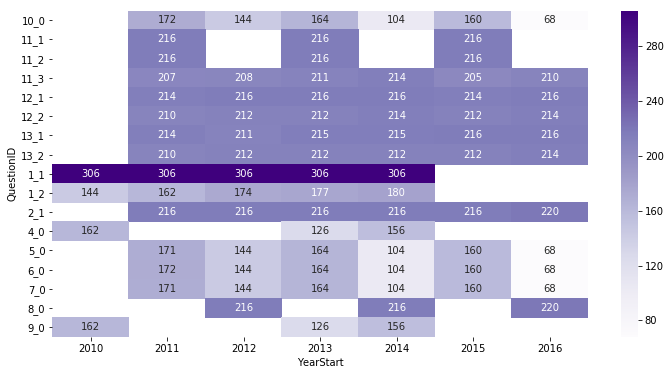

In [28]:
notNullHeatMap(dfDia[dfDia['StratificationCategoryID1'] == 'GENDER'], columns='YearStart', cmap="Purples")

Notice that some studies were done every other year or are missing some years, since the number of `notnull()` values does not vary wildly from year to year, we can use interpolation to fill in some of the null values

### Interpolate to fill in null values

In [29]:
def interpGroup(g):
    g=g.interpolate() #fills in later values
    g=g.interpolate(limit_direction='backward') #fills in early values
    return g
dfInterp = dfGender.copy()
#interpolate across years for the same Gender and Location (maintains differences)
dfInterp = dfInterp.groupby(level=[0,1]).apply(interpGroup) #need to keep indices 0 and 1 unchanged
dfInterp.head(10)

QuestionID                                      DIA10_0  DIA11_1  DIA11_2  \
StratificationID1 LocationID YearStart YearEnd                              
GENF              1          2010      2010        52.7    72.90    78.10   
                             2011      2011        52.7    72.90    78.10   
                             2012      2012        55.3    71.50    78.75   
                             2013      2013        54.2    70.10    79.40   
                             2014      2014        54.4    69.00    79.00   
                             2015      2015        54.6    67.90    78.60   
                             2016      2016        54.8    67.90    78.60   
                  2          2010      2010        64.5    59.00    77.20   
                             2011      2011        64.5    59.00    77.20   
                             2012      2012        77.9    61.45    72.70   

QuestionID                                      DIA11_3  DIA12_1  DIA12_2  \
StratificationID1 LocationID YearStart YearEnd                              
GENF              1          2010      2010        33.8     45.9     66.6   
                             2011      2011        33.8     45.9     66.6   
                             2012      2012        36.7     50.9     66.0   
                             2013      2013        35.4     50.8     59.8   
                             2014      2014        35.3     50.4     70.2   
                             2015      2015        38.5     52.0     60.4   
                             2016      2016        40.1     39.7     59.3   
                  2          2010      2010        43.6     43.9     56.4   
                             2011      2011        43.6     43.9     56.4   
                             2012      2012        34.4     36.7     66.5   

QuestionID                                      DIA13_1  DIA13_2  DIA1_1  \
StratificationID1 LocationID YearStart YearEnd                             
GENF              1          2010      2010        48.0     76.7    85.1   
                             2011      2011        48.0     76.7    79.3   
                             2012      2012        44.8     78.6    76.2   
                             2013      2013        48.3     75.0    74.3   
                             2014      2014        43.9     76.8    65.8   
                             2015      2015        47.5     74.1    65.8   
                             2016      2016        51.3     79.0    65.8   
                  2          2010      2010        63.1     73.7    36.4   
                             2011      2011        63.1     73.7    41.6   
                             2012      2012        41.6     86.3    49.3   

QuestionID                                      DIA1_2  DIA2_1  DIA4_0  \
StratificationID1 LocationID YearStart YearEnd                           
GENF              1          2010      2010        1.4    12.5     NaN   
                             2011      2011        1.4    12.5     NaN   
                             2012      2012        1.3    12.0     NaN   
                             2013      2013        1.7    14.1     NaN   
                             2014      2014        1.5    13.0     NaN   
                             2015      2015        1.5    14.0     NaN   
                             2016      2016        1.5    14.4     NaN   
                  2          2010      2010        NaN     8.2     NaN   
                             2011      2011        NaN     8.2     NaN   
                             2012      2012        NaN     7.4     NaN   

QuestionID                                         DIA5_0     DIA6_0  \
StratificationID1 LocationID YearStart YearEnd                         
GENF              1          2010      2010     65.500000  72.300000   
                             2011      2011     65.500000  72.300000   
                             2012      2012     66.300000  7

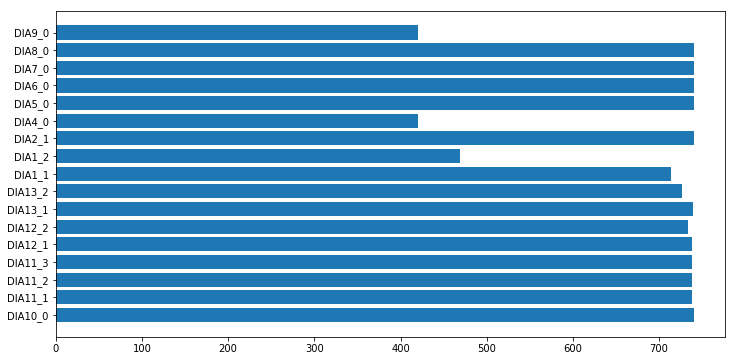

In [30]:
notNullBarChart(dfInterp)

### What Questions Appear to be Related?

Make a function to easily see the correlation (pearson) between different questions 

In [31]:
def corrHeatMap(df, figsize=(20,20)):
    corr = df.corr(method='pearson')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    corr_cmap = sns.diverging_palette(220, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=figsize)     
    _ = sns.heatmap(corr, mask=mask, cmap=corr_cmap, annot=True, ax=ax)

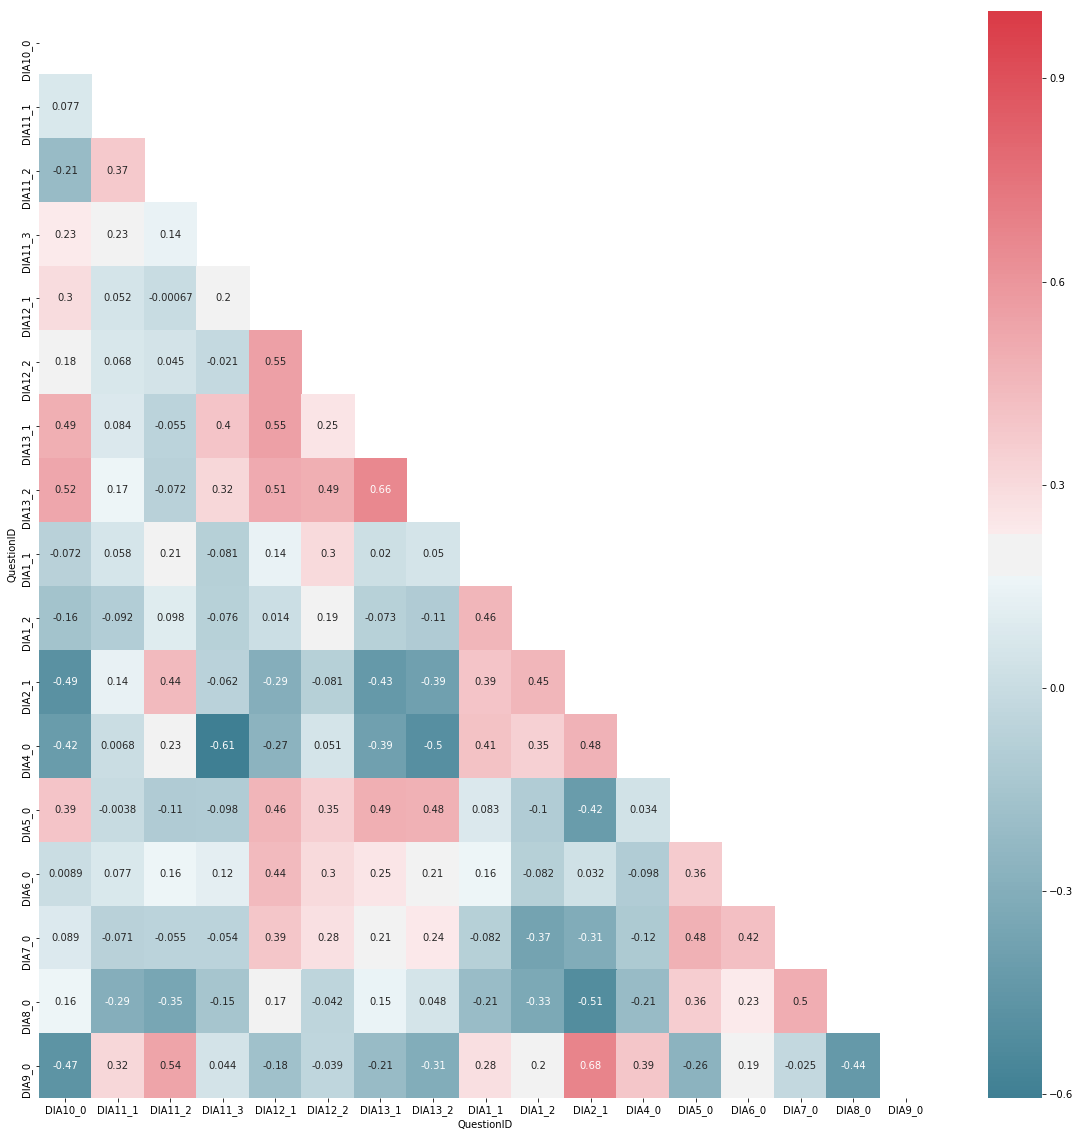

In [32]:
corrHeatMap(dfInterp)

Make a function to easily see distribution differences between genders for each question

In [33]:
def indicatorFacetGrid(df):
    #instead of sns.pairplot, use sns.FacetGrid: better short hand analysis for distribution 
    g = sns.FacetGrid(pd.melt(df.reset_index(),
                          id_vars=['StratificationID1'],
                          value_vars=dfInterp.columns),
                      hue='StratificationID1',col='QuestionID',col_wrap=6,
                      sharex=False, sharey=False, legend_out=True)
    _ = g.map(sns.kdeplot,'value')

Compare distributions between our data prior to interpolation and after: make sure there aren't any drastic changes

Before Interpolation

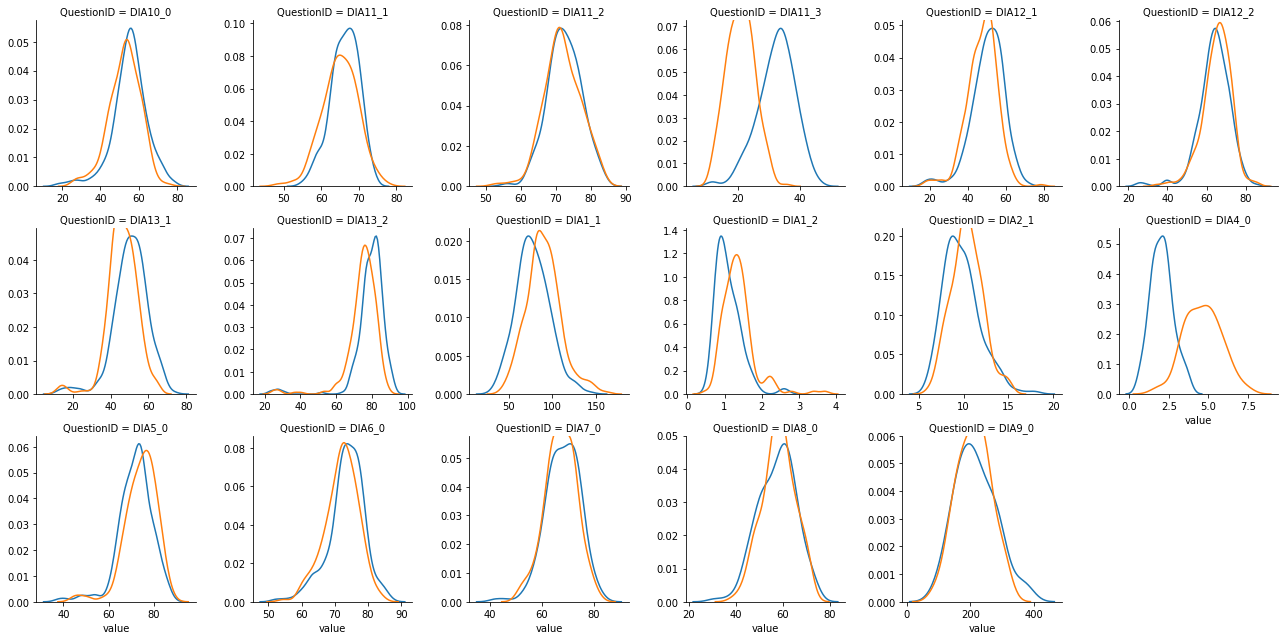

In [34]:
indicatorFacetGrid(dfGender)

After Interpolation

Note that there are some extra bumps in the data, but the overall shape and distribution is maintained

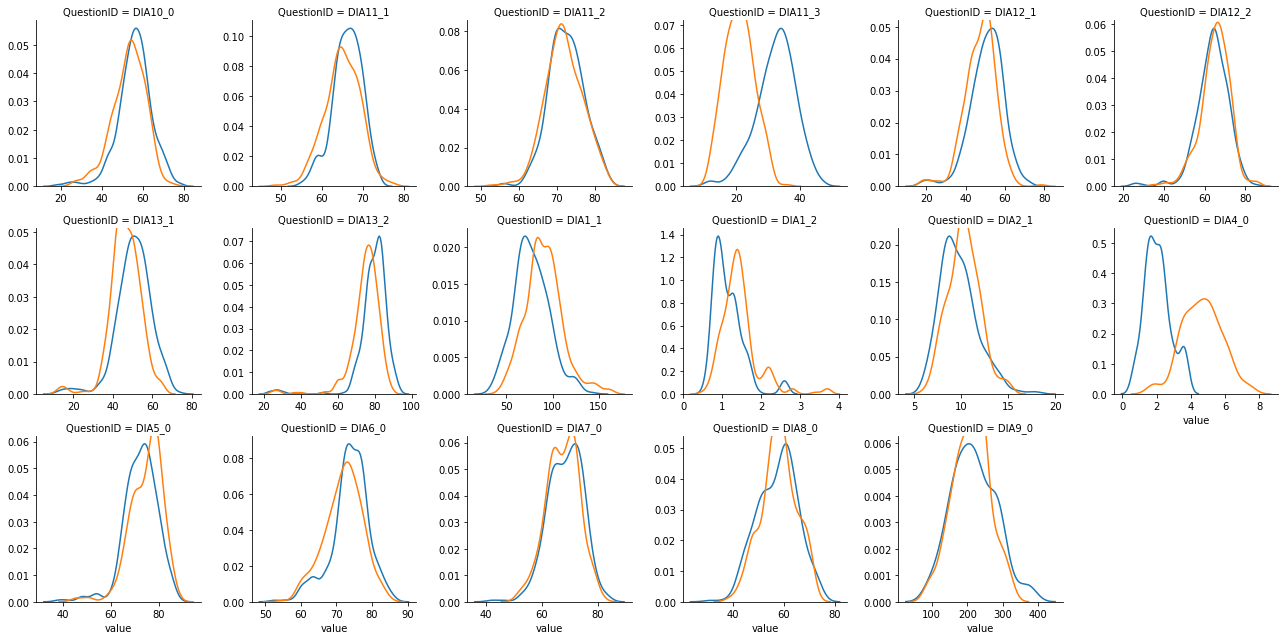

In [35]:
indicatorFacetGrid(dfInterp)

To better show the gender differences in `DIA11_3` we will show a boxplot

Text(0.5,1,'Comorbidity of Depressive Disorders and Diabetes by Gender')

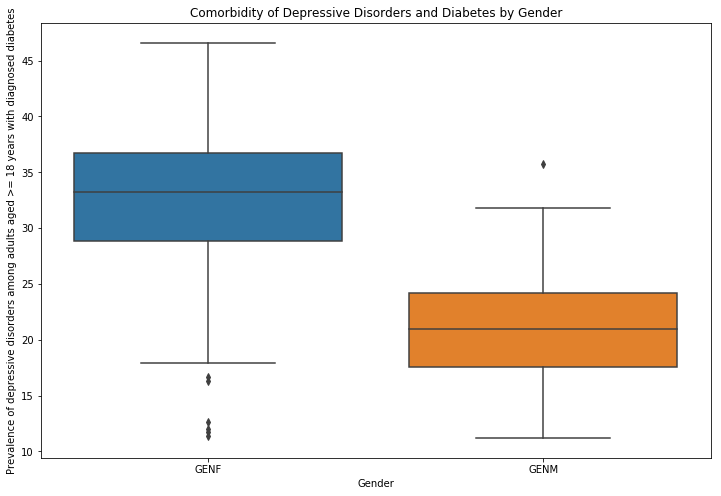

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x="StratificationID1", y="DIA11_3", data=dfInterp.reset_index(), ax = ax)
plt.xlabel("Gender")
plt.ylabel(dfQuestions.loc['DIA11_3', 'Question'])
plt.title('Comorbidity of Depressive Disorders and Diabetes by Gender')

### Use Machine Learning Algorithm to Predict Diabetes-Depression Comorbidity

Based on above information, we predict that Gender is going to be involved, but what other factors?

In [37]:
predictors = [
    'DIA1_1', #could be dropped but since variables 1_2 and 1_1 are related, we decided to keep it -- Death by Diabetes
    'DIA1_2',#1_1 death with diabetes CoD, 1_2 diabetic ketoacidosis CoD
    #'DIA2_1',
    #'DIA4_0',
    #'DIA5_0',
    #'DIA6_0',
    #'DIA7_0',
    'DIA8_0', #Dentist visits
    #'DIA9_0',
    #'DIA10_0',
    #'DIA11_1',
    #'DIA11_2',
    #'DIA12_1',
    #'DIA12_2',
    'DIA13_1', #pneumonia vaccinations, age group1
    'DIA13_2', #pneumonia vaccinations, age group2
    'StratificationID1', #Gender
    'LocationID', #location -- also could be dropped but we kept it in order to check for changes after implimentation
]
response = 'DIA11_3' #Diabetes combordidity with Depression
dfIndicators = dfInterp.reset_index()[predictors + [response]] 
print("Before dropping null values:", dfIndicators.shape)
dfIndicatorsNoNAN = dfIndicators.copy().dropna() 
print("After dropping null values:", dfIndicatorsNoNAN.shape)
dfIndicatorsNoNAN['StratificationID1'] = dfIndicatorsNoNAN['StratificationID1'].replace(['GENM', 'GENF'], [0,1])
X = dfIndicatorsNoNAN[predictors]
y = dfIndicatorsNoNAN[response]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
linregr = LinearRegression()
linregr.fit(X_train, y_train)
# Print y-intercept (beta_0)
beta_0 = linregr.intercept_
print("Beta_0 (y-intercept) for %s linear regression model is %0.04f" % (response, beta_0))
for N in range(len(predictors)):
    beta_N = linregr.coef_[N]
    print("Beta_%d (slope) for %s is %0.04f" %(N+1, predictors[N], beta_N))
    if abs(beta_N) < 0.1: #set a maximum beta value to be of interest
        print("Consider dropping: %s" %(predictors[N]))

y_pred = linregr.predict(X_test)

linModel_score = r2_score(y_test, y_pred)
print ("R^2 score for %s linear regression model is %0.04f" % (response, linModel_score))

Before dropping null values: (740, 8)
After dropping null values: (469, 8)
Beta_0 (y-intercept) for DIA11_3 linear regression model is 4.4121
Beta_1 (slope) for DIA1_1 is 0.0599
Consider dropping: DIA1_1
Beta_2 (slope) for DIA1_2 is 0.9826
Beta_3 (slope) for DIA8_0 is -0.2001
Beta_4 (slope) for DIA13_1 is 0.2416
Beta_5 (slope) for DIA13_2 is 0.1407
Beta_6 (slope) for StratificationID1 is 11.1183
Beta_7 (slope) for LocationID is -0.0201
Consider dropping: LocationID
R^2 score for DIA11_3 linear regression model is 0.7010


In [38]:
#check out r^2 with cross-validation
from sklearn.model_selection import ShuffleSplit
for folds in range(5,21,5):
    #how CV selects each fold is equivalent of test_train_split fold times to get several selections
    cv = ShuffleSplit(n_splits=folds, test_size=0.3, random_state=42) 
    cv_results = cross_val_score(linregr, X, y, cv = cv, scoring='r2')
    print("For %d folds: %f " % (folds, np.mean(cv_results)))

For 5 folds: 0.700234 
For 10 folds: 0.712965 
For 15 folds: 0.711496 
For 20 folds: 0.712079 
